In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Firstly, I read the data.

flights = pd.read_csv("BOS_CUN_trips1M.csv",)
flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1


In [3]:
flights.tail()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
1202440,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,19,1379270769,USD,664.37,101.37,0.0,Sabre,TCY,B6,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202441,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,20,1379270769,USD,486.87,113.87,0.0,Sabre,TCY,UA,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202442,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,21,1379270769,USD,554.87,113.87,0.0,Sabre,TCY,US,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202443,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,22,1379270769,USD,486.87,113.87,0.0,Sabre,TCY,UA,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1
1202444,15742f8fd2e292ff0000014122f1ba477cbc247adc40c446,23,1379270769,USD,561.87,120.87,0.0,Sabre,TCY,US,...,False,1379270769,20130915,2013-09-15,2014-04-16,2014-04-23,7,3,3,1


In [4]:
# I want to see all the  column names.

flights.columns

Index([u'messageid', u'tripindex', u'received', u'currency', u'total', u'tax',
       u'surcharge', u'source', u'merchant', u'majorcarrierid', u'origin',
       u'destination', u'departure', u'return', u'outbounddurationminutes',
       u'outboundstops', u'returndurationminutes', u'returnstops',
       u'availableseats', u'cabinclass', u'paxtype', u'refundable',
       u'triptimestamp', u'receiveddate', u'received_odate',
       u'departure_odate', u'return_ddate', u'los2', u'departure_dow',
       u'return_dow', u'includes_sns'],
      dtype='object')

In [6]:
# I want to get some basic information about the flights DataFrame

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202445 entries, 0 to 1202444
Data columns (total 31 columns):
messageid                  1202445 non-null object
tripindex                  1202445 non-null int64
received                   1202445 non-null int64
currency                   1202445 non-null object
total                      1202445 non-null float64
tax                        1202445 non-null float64
surcharge                  1202445 non-null float64
source                     1202445 non-null object
merchant                   1202445 non-null object
majorcarrierid             1202445 non-null object
origin                     1202445 non-null object
destination                1202445 non-null object
departure                  1202445 non-null int64
return                     1202445 non-null int64
outbounddurationminutes    1202445 non-null int64
outboundstops              1202445 non-null int64
returndurationminutes      1202445 non-null int64
returnstops             

/Users/katarzynarachuta/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


'I noticed one very obvious outlier at ~$6,500\n75%  of the tickets are under around ~$1250'

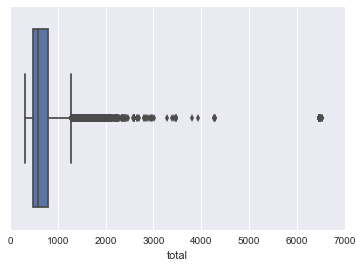

In [7]:
'''I now want to quick visualise the data using a box plot
This will help me to see how the data are spread out.
Here I make the assumption that the total includes the tax.'''

sns.boxplot(flights['total'], vert=False)

'''I noticed one very obvious outlier at ~$6,500
75%  of the tickets are under around ~$1250'''

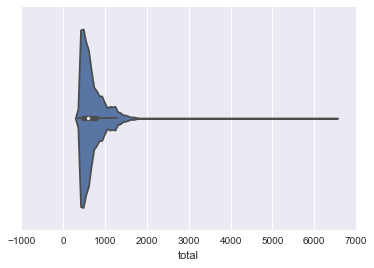

In [11]:
'''I also want to produce a violin plot as I am not sure if the box plot gives me the full picture.
This will help me to see how the flights are distributed'''

sns.violinplot(flights['total'])

# I can now see that there are a lot of flights around ~$500-600.

(array([  3.69275000e+05,   4.02028000e+05,   1.76229000e+05,
          1.10833000e+05,   6.60720000e+04,   4.90930000e+04,
          1.95260000e+04,   7.10100000e+03,   1.57200000e+03,
          3.33000000e+02,   2.05000000e+02,   1.80000000e+01,
          9.00000000e+00,   4.00000000e+00,   9.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.24000000e+02]),
 array([  320.37      ,   497.60914286,   674.84828571,   852.08742857,
         1029.32657143,  1206.56571429,  1383.80485714,  1561.044     ,
         1738.28314286,  1915.52228571,  2092.76142857,  2270.00057143,
         2447.23971429,  2624.47885714,  2801.718     , 

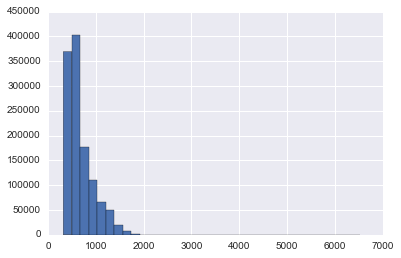

In [8]:
'''One last viualisation is a histogram. 
I played around witht the number of bins and decided to stick to 35 as this produces a clear picture.
Looking at the histogram, I actually think I could have skipped the violin plot.'''

plt.hist(flights['total'], bins=35)

(array([  1.70000000e+03,   3.43490000e+04,   1.08253000e+05,
          1.03648000e+05,   9.39940000e+04,   9.47580000e+04,
          8.23930000e+04,   7.78260000e+04,   7.75220000e+04,
          6.76010000e+04,   4.94840000e+04,   4.35420000e+04,
          2.95500000e+04,   3.42650000e+04,   2.70490000e+04,
          2.36180000e+04,   2.75910000e+04,   2.76190000e+04,
          1.92230000e+04,   1.86750000e+04,   1.47200000e+04,
          1.04230000e+04,   1.30620000e+04,   1.26590000e+04,
          1.54020000e+04,   1.13250000e+04,   1.06140000e+04,
          1.39430000e+04,   1.09710000e+04,   6.61300000e+03,
          7.38300000e+03,   5.17300000e+03,   3.49000000e+03,
          4.71100000e+03,   3.58600000e+03,   3.65500000e+03,
          2.67100000e+03,   1.91600000e+03,   9.98000000e+02,
          1.19400000e+03,   1.54600000e+03,   1.36900000e+03,
          3.87000000e+02,   6.13000000e+02,   2.76000000e+02,
          1.68000000e+02,   9.90000000e+01,   1.61000000e+02,
        

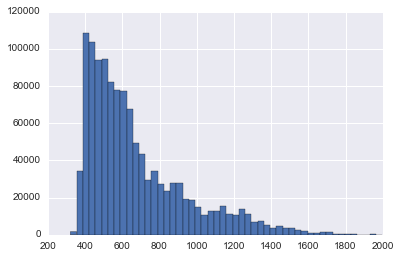

In [9]:
'''It seems to me that it would make sense to visualise the data for prices below $2,000.
This will allow me to see better the distribution around those lower values.'''

flights2 = flights[flights['total'] < 2000]

plt.hist(flights2['total'], bins=50)

In [10]:
'''I have now seen how the data are distributed.
I want to get now the actual numbers for the mean and quartiles.'''

flights_price = flights['total']
flights_price = pd.DataFrame(flights_price)
flights_price.describe()

,total
count,1.202445e+06
mean,6.742877e+02
std,2.787050e+02
min,3.203700e+02
25%,4.719500e+02
50%,5.913700e+02
75%,7.933700e+02
max,6.523740e+03


In [12]:
'''This means that the mean price is ~$674, we will pay the minimum of $320. 
50% of the flights cost $591 or less and 75% of the flights cost $793 or less.
The most expensive flight was at $6523.74'''

In [ ]:
'''There are a number of factors that will affect the price: 
the cabin class - I would expect the flights to be expensive for first class and cheapest for the economy class
the number of stopovers - I expect direct flights to be most expensive
refundable/non-refundable tickets - I would expect the latter to be cheaper
airline - some airlines will be more expensive than others
date booked - booking really far ahead and really close to the departure date should be expensive
travel time - some times will be cheaper than others
day of the week when we searched for the prices - usually it is recommended that you book a flight on a Tuesday and
avoid booking on a Friday.
I will now test these hypotheses.'''